<a href="https://colab.research.google.com/github/WittyFrost/trails/blob/master/Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise: Car Evaluation Prediction with Naive Bayes Classifier

**Objective:** Implement a Naive Bayes classifier to predict car evaluations based on several features using Python, pandas, and numpy. This exercise will help you understand how to manipulate data frames, perform basic data analysis, and apply probabilistic models to real-world datasets.

**Dataset:** car-eval.csv - A dataset containing evaluations of cars based on several attributes. Each row represents a car with various features such as buying price, maintenance cost, number of doors, capacity in terms of persons to carry, the size of the luggage boot, safety, and an overall evaluation (class).

## Libraries to be used:

*  pandas for data manipulation and analysis.
*  numpy for numerical operations.

## Steps:

### Data Loading and Exploration:

*  Load the dataset from the car-eval.csv file into a pandas DataFrame.
*  Perform a basic exploration of the dataset. Display the first few rows of the dataset, and use the .describe() method to get a summary of the data.

### Dataset Splitting:

*  Split the dataset into training and testing datasets based on a specific condition (e.g., based on the index). Ensure that the testing dataset includes every 79th record.

### Feature Analysis:

*  Determine the unique values and their frequencies for categorical features in the training dataset. This includes features like 'buying', 'maint', 'doors', 'persons', 'lug_boot', and 'safety'.
*  Calculate and visualize the probability distributions of these features with respect to the target variable ('class').

### Naive Bayes Classifier Implementation:

*  Implement a Naive Bayes classifier from scratch. Utilize numpy to handle calculations involving probabilities and pandas for data manipulation.
*  Calculate the probability of each class based on the given features, and predict the class for each instance in the test dataset.
*  Normalize the probabilities to ensure they sum up to 1 for each prediction.

### Evaluation:

*  Calculate the accuracy of your model on the test dataset.


### Upload the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving car-eval.csv to car-eval.csv


### Data Preparation and Exploration with Pandas

In [ ]:
# for data manipulation
import pandas as pd
# for array operations
import numpy as np

# read dataset from csv file
dataset = pd.read_csv('car-eval.csv')
print(dataset)
dataset.describe()

     buying  maint  doors persons lug_boot safety  clazz
0     vhigh  vhigh      2       2    small    low  unacc
1     vhigh  vhigh      2       2    small    med  unacc
2     vhigh  vhigh      2       2    small   high  unacc
3     vhigh  vhigh      2       2      med    low  unacc
4     vhigh  vhigh      2       2      med    med  unacc
...     ...    ...    ...     ...      ...    ...    ...
1723    low    low  5more    more      med    med   good
1724    low    low  5more    more      med   high  vgood
1725    low    low  5more    more      big    low  unacc
1726    low    low  5more    more      big    med   good
1727    low    low  5more    more      big   high  vgood

[1728 rows x 7 columns]


,buying,maint,doors,persons,lug_boot,safety,clazz
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


* Import Libraries: The code begins by importing the necessary libraries for data manipulation and array operations. pandas (imported as pd) is used for handling datasets, while numpy (imported as np) is utilized for efficient array operations.

* Read Dataset: The code reads a dataset stored in a CSV file named 'car-eval.csv' using the pd.read_csv() function from the Pandas library. The dataset is then stored in a variable named dataset.

* Print Dataset: The print(dataset) statement displays the contents of the dataset, allowing a quick visual inspection of the data's structure and values.

* Generate Descriptive Statistics: The dataset.describe() function is called to generate summary statistics for the dataset. This includes statistics such as count, mean, standard deviation, minimum, and maximum values for numerical columns. These descriptive statistics provide initial insights into the distribution and characteristics of the dataset, aiding in further analysis and decision-making processes.

### Dataset Splitting for Training and Testing

In [ ]:
# if dataset.index % test_indis == 0
# then it is going to be used as test dataset
# they will not be attended into the train dataset
# Splitting the dataset based on the condition
test_indis = 79
# Using boolean indexing for splitting
test_dataset = dataset[dataset.index % test_indis == 0]
train_dataset = dataset[dataset.index % test_indis != 0]

# If you want to print the total count of the sample space in the train dataset
total = len(train_dataset)
print(f"Total count of train dataset: {total}")

Total count of train dataset: 1706


* Defining Test Index: The variable test_indis is set to 79, representing the index value used for splitting the dataset into training and testing subsets.
* Splitting the Dataset: The code uses boolean indexing to split the dataset into two subsets:
1.   test_dataset: Contains data points where the index is divisible by test_indis. These data points will be reserved for testing and are excluded from the training dataset.
2.   train_dataset: Contains data points where the index is not divisible by test_indis. These data points constitute the training dataset.

### Computing and Visualizing Class Probabilities

In [ ]:
# unique values of clazz column
keys_clazz = np.array(train_dataset["clazz"].unique())

# let's initiate a matrix to hold counts (buying X clazz)
p_clazz = np.zeros((len(keys_clazz)))

# zip only buying and clazz values
for u in train_dataset["clazz"]:
    # get index of current clazz value
    index_clazz = np.where(keys_clazz == u)

    # increment 1 the count of the intersection of buying x clazz pair.
    p_clazz[index_clazz] += 1

# let's normalize the possibilities and  Normalize Counts to Get Probabilities
p_clazz = p_clazz / np.sum(p_clazz, axis=0, keepdims=True)

# we create a pandas dataframe to visualize the table more familiar
df_p_clazz = pd.DataFrame(p_clazz, keys_clazz)

# possibilities of class values
df_p_clazz

,0
unacc,0.700469
acc,0.222743
vgood,0.036928
good,0.039859


* Unique Values Extraction: The code extracts unique values from the 'clazz' column of the training dataset using NumPy's unique() function.
These unique values are stored in the keys_clazz array.
* Matrix Initialization: A matrix named p_clazz is initialized to hold counts for each combination of 'buying' and 'clazz'.
* Counting Occurrences: A loop iterates over each value in the 'clazz' column of the training dataset. For each value, the code finds its corresponding index in the keys_clazz array and increments the count in the p_clazz matrix.
* Normalization: The counts in the p_clazz matrix are normalized to compute probabilities. Each count is divided by the total count of occurrences to obtain probabilities.
* Creating DataFrame: A Pandas DataFrame named df_p_clazz is created to visualize the probabilities in a tabular format. The index of the DataFrame corresponds to unique 'clazz' values, and the columns represent probabilities for each 'clazz' value.
* Displaying Class Probabilities: The DataFrame df_p_clazz displays the probabilities of each 'clazz' value, providing insights into the distribution of classes within the dataset.

### Computing and Visualizing Conditional Probabilities of 'buying' Given 'clazz'

This section follows the same steps as above.

In [ ]:
# unique values of buying column
keys_buying = np.array(train_dataset["buying"].unique())

# unique values of clazz column
keys_clazz = np.array(train_dataset["clazz"].unique())

# let's initiate a matrix to hold counts (buying X clazz)
p_buying_given_clazz = np.zeros((len(keys_buying), len(keys_clazz)))

# zip only buying and clazz values
for u in zip(train_dataset["buying"], train_dataset["clazz"]):
    # get index of current buying value
    index_buying = np.where(keys_buying == u[0])

    # get index of current clazz value
    index_clazz = np.where(keys_clazz == u[1])

    # increment 1 the count of the intersection of buying x clazz pair.
    p_buying_given_clazz[[index_buying], [index_clazz]] += 1

# we create a pandas dataframe to visualize the table more familiar
df_p_buying_given_clazz = pd.DataFrame(p_buying_given_clazz, keys_buying, keys_clazz)

# counts of buying given class
df_p_buying_given_clazz

,unacc,acc,vgood,good
vhigh,355.0,71.0,0.0,0.0
high,320.0,107.0,0.0,0.0
med,264.0,115.0,25.0,22.0
low,256.0,87.0,38.0,46.0


### Normalizing Conditional Probabilities of 'buying' Given 'clazz'

In [ ]:
# let's normalize the possibilities
p_buying_given_clazz = p_buying_given_clazz / np.sum(p_buying_given_clazz, axis=0, keepdims=True)

# we create a pandas dataframe to visualize the table more familiar
df_p_buying_given_clazz = pd.DataFrame(p_buying_given_clazz, keys_buying, keys_clazz)

# possibilities of buying values given class
df_p_buying_given_clazz

,unacc,acc,vgood,good
vhigh,0.297071,0.186842,0.000000,0.000000
high,0.267782,0.281579,0.000000,0.000000
med,0.220921,0.302632,0.396825,0.323529
low,0.214226,0.228947,0.603175,0.676471


* Normalization: The conditional probabilities matrix p_buying_given_clazz is normalized. Each element in the matrix is divided by the sum of its respective column. This ensures that the conditional probabilities sum up to 1 for each 'clazz' value.
* Creating DataFrame: A new Pandas DataFrame named df_p_buying_given_clazz is created to display the normalized conditional probabilities in a tabular format.
The rows of the DataFrame represent unique 'buying' values, and the columns represent unique 'clazz' values.

### Computing and Visualizing Conditional Probabilities of 'maint' Given 'clazz'

In [ ]:
# unique values of maint column
keys_maint = np.array(train_dataset["maint"].unique())

# unique values of clazz column
keys_clazz = np.array(train_dataset["clazz"].unique())

# let's initiate a matrix to hold counts (maint X clazz)
p_maint_given_clazz = np.zeros((len(keys_maint), len(keys_clazz)))

# zip only maint and clazz values
for u in zip(train_dataset["maint"], train_dataset["clazz"]):
    # get index of current maint value
    index_maint = np.where(keys_maint == u[0])

    # get index of current clazz value
    index_clazz = np.where(keys_clazz == u[1])

    # increment 1 the count of the intersection of maint x clazz pair.
    p_maint_given_clazz[[index_maint], [index_clazz]] += 1

# let's normalize the possibilities
p_maint_given_clazz = p_maint_given_clazz / np.sum(p_maint_given_clazz, axis=0, keepdims=True)

# we create a pandas dataframe to visualize the table more familiar
df_p_maint_given_clazz = pd.DataFrame(p_maint_given_clazz, keys_maint, keys_clazz)

# possibilities of maint values given class
df_p_maint_given_clazz

,unacc,acc,vgood,good
vhigh,0.297071,0.186842,0.000000,0.000000
high,0.259414,0.271053,0.206349,0.000000
med,0.220921,0.302632,0.380952,0.338235
low,0.222594,0.239474,0.412698,0.661765


### Computing and Visualizing Conditional Probabilities of 'doors' Given 'clazz'

In [ ]:
# unique values of doors column
keys_doors = np.array(train_dataset["doors"].unique())

# unique values of clazz column
keys_clazz = np.array(train_dataset["clazz"].unique())

# let's initiate a matrix to hold counts (doors X clazz)
p_doors_given_clazz = np.zeros((len(keys_doors), len(keys_clazz)))

# zip only doors and clazz values
for u in zip(train_dataset["doors"], train_dataset["clazz"]):
    # get index of current doors value
    index_doors = np.where(keys_doors == u[0])

    # get index of current clazz value
    index_clazz = np.where(keys_clazz == u[1])

    # increment 1 the count of the intersection of doors x clazz pair.
    p_doors_given_clazz[[index_doors], [index_clazz]] += 1

# let's normalize the possibilities
p_doors_given_clazz = p_doors_given_clazz / np.sum(p_doors_given_clazz, axis=0, keepdims=True)

# we create a pandas dataframe to visualize the table more familiar
df_p_doors_given_clazz = pd.DataFrame(p_doors_given_clazz, keys_doors, keys_clazz)

# possibilities of doors values given class
df_p_doors_given_clazz

,unacc,acc,vgood,good
2,0.268619,0.213158,0.142857,0.220588
3,0.247699,0.257895,0.238095,0.264706
4,0.241841,0.265789,0.301587,0.250000
5more,0.241841,0.263158,0.317460,0.264706


### Computing and Visualizing Conditional Probabilities of 'persons' Given 'clazz'

In [ ]:
# unique values of persons column
keys_persons = np.array(train_dataset["persons"].unique())

# unique values of clazz column
keys_clazz = np.array(train_dataset["clazz"].unique())

# let's initiate a matrix to hold counts (persons X clazz)
p_persons_given_clazz = np.zeros((len(keys_persons), len(keys_clazz)))

# zip only persons and clazz values
for u in zip(train_dataset["persons"], train_dataset["clazz"]):
    # get index of current persons value
    index_persons = np.where(keys_persons == u[0])

    # get index of current clazz value
    index_clazz = np.where(keys_clazz == u[1])

    # increment 1 the count of the intersection of persons x clazz pair.
    p_persons_given_clazz[[index_persons], [index_clazz]] += 1

# let's normalize the possibilities
p_persons_given_clazz = p_persons_given_clazz / np.sum(p_persons_given_clazz, axis=0, keepdims=True)

# we create a pandas dataframe to visualize the table more familiar
df_p_persons_given_clazz = pd.DataFrame(p_persons_given_clazz, keys_persons, keys_clazz)

# possibilities of persons values given class
df_p_persons_given_clazz

,unacc,acc,vgood,good
2,0.477824,0.000000,0.000000,0.000000
4,0.257741,0.513158,0.460317,0.529412
more,0.264435,0.486842,0.539683,0.470588


### Computing and Visualizing Conditional Probabilities of 'lug_boot' Given 'clazz'

In [ ]:
# unique values of lugboot column
keys_lugboot = np.array(train_dataset["lug_boot"].unique())

# unique values of clazz column
keys_clazz = np.array(train_dataset["clazz"].unique())

# let's initiate a matrix to hold counts (lugboot X clazz)
p_lugboot_given_clazz = np.zeros((len(keys_lugboot), len(keys_clazz)))

# zip only lugboot and clazz values
for u in zip(train_dataset["lug_boot"], train_dataset["clazz"]):
    # get index of current lugboot value
    index_lugboot = np.where(keys_lugboot == u[0])

    # get index of current clazz value
    index_clazz = np.where(keys_clazz == u[1])

    # increment 1 the count of the intersection of lugboot x clazz pair.
    p_lugboot_given_clazz[[index_lugboot], [index_clazz]] += 1

# let's normalize the possibilities
p_lugboot_given_clazz = p_lugboot_given_clazz / np.sum(p_lugboot_given_clazz, axis=0, keepdims=True)

# we create a pandas dataframe to visualize the table more familiar
df_p_lugboot_given_clazz = pd.DataFrame(p_lugboot_given_clazz, keys_lugboot, keys_clazz)

# possibilities of lugboot values given class
df_p_lugboot_given_clazz

,unacc,acc,vgood,good
small,0.372385,0.271053,0.000000,0.308824
med,0.323013,0.355263,0.380952,0.338235
big,0.304603,0.373684,0.619048,0.352941


### Computing and Visualizing Conditional Probabilities of 'safety' Given 'clazz'

In [ ]:
# unique values of safety column
keys_safety = np.array(train_dataset["safety"].unique())

# unique values of clazz column
keys_clazz = np.array(train_dataset["clazz"].unique())

# let's initiate a matrix to hold counts (safety X clazz)
p_safety_given_clazz = np.zeros((len(keys_safety), len(keys_clazz)))

# zip only safety and clazz values
for u in zip(train_dataset["safety"], train_dataset["clazz"]):
    # get index of current safety value
    index_safety = np.where(keys_safety == u[0])

    # get index of current clazz value
    index_clazz = np.where(keys_clazz == u[1])

    # increment 1 the count of the intersection of safety x clazz pair.
    p_safety_given_clazz[[index_safety], [index_clazz]] += 1

# let's normalize the possibilities
p_safety_given_clazz = p_safety_given_clazz / np.sum(p_safety_given_clazz, axis=0, keepdims=True)

# we create a pandas dataframe to visualize the table more familiar
df_p_safety_given_clazz = pd.DataFrame(p_safety_given_clazz, keys_safety, keys_clazz)

# possibilities of safety values given class
df_p_safety_given_clazz

,unacc,acc,vgood,good
med,0.294561,0.471053,0.0,0.558824
high,0.230126,0.528947,1.0,0.441176
low,0.475314,0.000000,0.0,0.000000


## <font color='red'> Task 1

* Try removing or adding certain features/columns from the dataset to observe how it affects the accuracy of the model. You can comment out lines related to specific columns (e.g., buying, maint, doors, persons, lug_boot, safety) to see their impact.

### Computing Marginal Probabilities of 'buying' Values

In [ ]:
# let's compute marginal probabilities of buying values
p_buying = np.sum(p_clazz * p_buying_given_clazz, axis=1)

# we create a pandas dataframe to visualize the table more familiar
df_p_buying = pd.DataFrame(p_buying, keys_buying)

# possibilities of buying values
df_p_buying

,0
vhigh,0.249707
high,0.250293
med,0.249707
low,0.250293


* Marginal Probability Calculation: The marginal probabilities of 'buying' values are computed by summing the product of the class probabilities p_clazz and the conditional probabilities of 'buying' given 'clazz' p_buying_given_clazz across all 'clazz' values.

This operation yields the probability of each 'buying' value irrespective of 'clazz'.

* Creating DataFrame: A Pandas DataFrame named df_p_buying is created to visualize the computed marginal probabilities in a tabular format.
The index of the DataFrame represents unique 'buying' values.
Displaying Marginal Probabilities:

The DataFrame df_p_buying displays the marginal probabilities of 'buying' values, providing insights into the distribution of buying preferences within the dataset.

### Computing Marginal Probabilities of 'maint' Values

In [ ]:
# let's compute marginal probabilities of maint values
p_maint = np.sum(p_clazz * p_maint_given_clazz, axis=1)

# we create a pandas dataframe to visualize the table more familiar
df_p_maint = pd.DataFrame(p_maint, keys_maint)

# possibilities of maint values
df_p_maint

,0
vhigh,0.249707
high,0.249707
med,0.249707
low,0.250879


### Computing Marginal Probabilities of 'doors' Values

In [ ]:
# let's compute marginal probabilities of doors values
p_doors = np.sum(p_clazz * p_doors_given_clazz, axis=1)

# we create a pandas dataframe to visualize the table more familiar
df_p_doors = pd.DataFrame(p_doors, keys_doors)

# possibilities of doors values
df_p_doors

,0
2,0.249707
3,0.250293
4,0.249707
5more,0.250293


### Computing Marginal Probabilities of 'persons' Values

In [ ]:
# let's compute marginal probabilities of persons values
p_persons = np.sum(p_clazz * p_persons_given_clazz, axis=1)

# we create a pandas dataframe to visualize the table more familiar
df_p_persons = pd.DataFrame(p_persons, keys_persons)

# possibilities of persons values
df_p_persons

,0
2,0.334701
4,0.332943
more,0.332356


### Computing Marginal Probabilities of 'lugboot' Values

In [ ]:
# let's compute marginal probabilities of lug_boot values
p_lugboot = np.sum(p_clazz * p_lugboot_given_clazz, axis=1)

# we create a pandas dataframe to visualize the table more familiar
df_p_lugboot = pd.DataFrame(p_lugboot, keys_lugboot)

# possibilities of lug_boot values
df_p_lugboot

,0
small,0.333529
med,0.332943
big,0.333529


### Computing Marginal Probabilities of 'safety' Values

In [ ]:
# let's compute marginal probabilities of safety values
p_safety = np.sum(p_clazz * p_safety_given_clazz, axis=1)

# we create a pandas dataframe to visualize the table more familiar
df_p_safety = pd.DataFrame(p_safety, keys_safety)

# possibilities of safety values
df_p_safety

,0
med,0.333529
high,0.333529
low,0.332943


### Classification Accuracy Calculation

In [ ]:
correct = 0
for idx, item in test_dataset.iterrows():
    alpha = 1
    denominator = 0
    possibilities = {}
    for cls in keys_clazz:
        p = 1
        p *= (df_p_buying_given_clazz[cls][item.buying])
        p *= (df_p_maint_given_clazz[cls][item.maint])
        p *= (df_p_doors_given_clazz[cls][item.doors])
        p *= (df_p_persons_given_clazz[cls][item.persons])
        p *= (df_p_lugboot_given_clazz[cls][item.lug_boot])
        p *= (df_p_safety_given_clazz[cls][item.safety])
        p *= df_p_clazz[0][cls]

        denominator += p

        possibilities[cls] = p
    # end of for loop

    possibilities.update({k: v / denominator for k, v in possibilities.items()})

    #print(possibilities)
    correct += max(possibilities, key=possibilities.get) == item.clazz
# end of for loop

print("accuracy: %d%%" % ((correct / len(test_dataset)) * 100))

accuracy: 81%


* Initialization: correct variable is initialized to keep track of the number of correct predictions.
* Loop through Test Dataset: The code iterates through each row of the test dataset using iterrows() function.
* Calculate Probabilities:
1.   For each row in the test dataset, the code calculates the probability of each class (clazz) given the values of features ('buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety') using the Naïve Bayes formula.
2.   It multiplies the conditional probabilities of each feature given the class (df_p_feature_given_clazz) and the prior probability of the class (df_p_clazz).
3.   It sums up these probabilities to compute the denominator for normalization.
4.   It stores the calculated probabilities in a dictionary named possibilities.

* Normalization: After calculating the probabilities for each class, it normalizes them by dividing each probability by the sum of all probabilities.

* Accuracy Calculation:
1.   It compares the predicted class (class with the maximum probability) with the actual class for each row in the test dataset.
2.   If the predicted class matches the actual class, it increments the correct count.

## <font color='red'> Task 2
* Experiment with different values of alpha (smoothing parameter) in the calculation of probabilities. You can modify the line alpha = 1 to test different values.
* Try different values for test_indis (test index divisor) to see how it affects the splitting of the dataset into training and testing sets.

### Distribution of Classes
This plot visualizes how many instances of each class are present in your dataset.

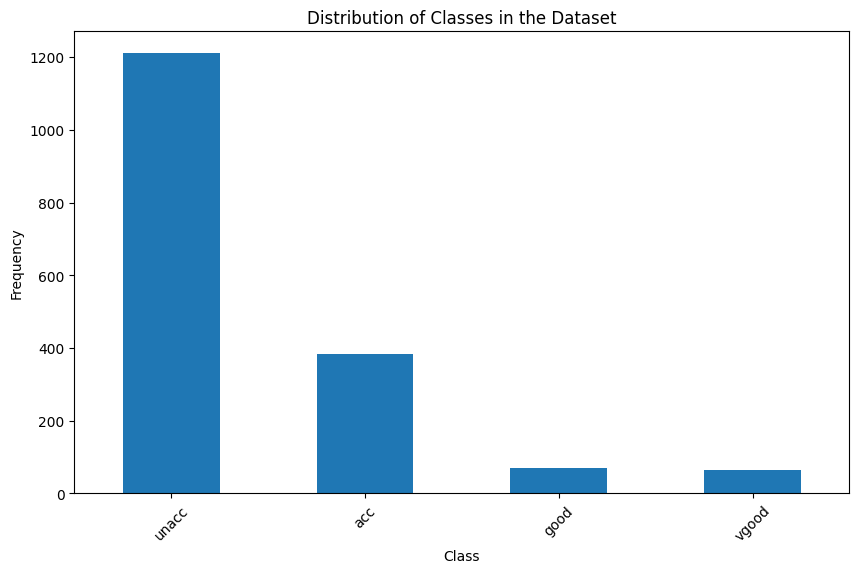

In [ ]:
import matplotlib.pyplot as plt

class_counts = dataset['clazz'].value_counts()

plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Distribution of Classes in the Dataset')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


### Feature Distribution Plots
Histograms for each categorical feature to visualize their distribution. Here's an example for the buying feature:

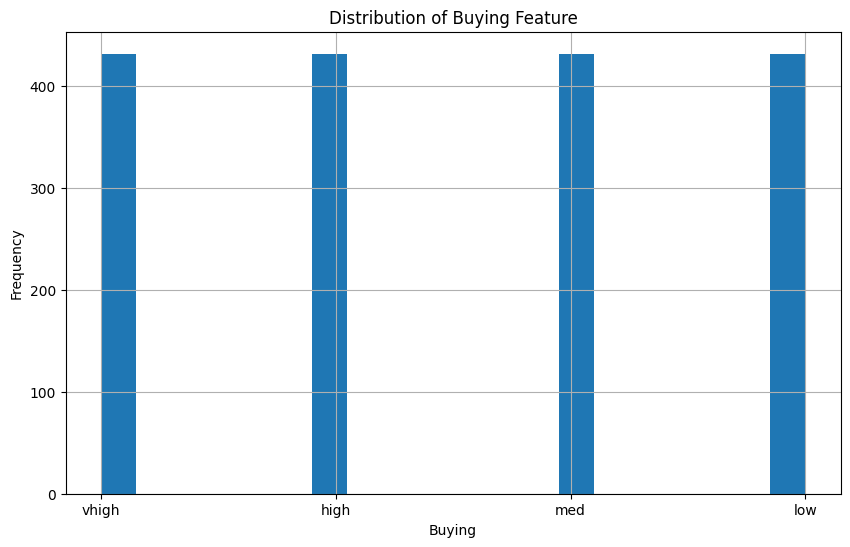

In [ ]:
plt.figure(figsize=(10, 6))
dataset['buying'].hist(bins=20)
plt.title('Distribution of Buying Feature')
plt.xlabel('Buying')
plt.ylabel('Frequency')
plt.show()


### Normalized Possibility Tables Visualization
Heatmaps can represent the normalized possibility tables effectively. Here's how to plot one for df_p_buying_given_clazz:

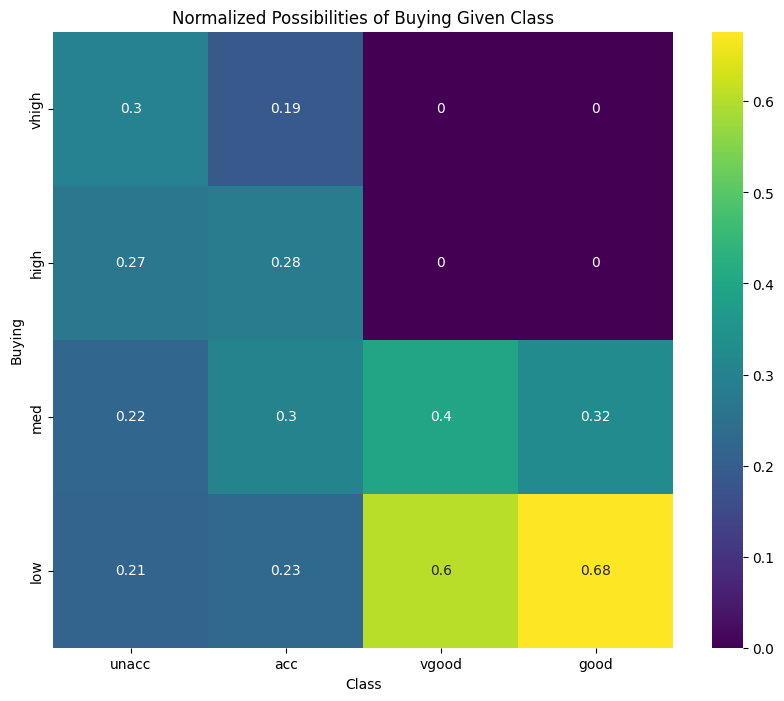

In [ ]:
c

## <font color='red'> Task 3

Repeat the process for other DataFrame tables like df_p_maint_given_clazz, df_p_doors_given_clazz, etc., by replacing df_p_buying_given_clazz with the respective DataFrame name.

## <font color='red'> Task 4

* Implement different evaluation metrics in addition to accuracy.
* Visualize the confusion matrix to understand which classes are being misclassified more often.